## Katwijk beach planetary rover daset 

[Dataset](https://robotics.estec.esa.int/datasets/katwijk-beach-11-2015/) created by the European Space Agency (ESA).

- Approx 1 km transverse (through a "boulder field"), It was focused on global localization by matching correspondeces between detectable features from "orbital" (aerial) images and those seen by the Rover during its transverse.
- The _boulder field_ was created artificially. 212 artificial boulders that were custom made and carefully distributed to resemeble boulders of a typical boulder field seen in Mars Reconnaissance Orbiter (MRO) images.
- A drone was used to simulate images taken by the HiRISE camera. Geo-referenced images have a resolution of approx. 2 cm/px.
- The sun was in the back.

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import glob

from PIL import Image

### Helper functions 

In [2]:
def plot_imgs(images = [], titles = [], figsize = (10,10)):
    size = len(images)
    fig = plt.figure(figsize=figsize)
    i = 1
    for image in images:
        ax = fig.add_subplot(1,size,i)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(titles[i-1])
        ax.imshow(image)
        i += 1
    return None

def read_imgs(imgs_paths):
    imgs = []   
    for path in imgs_paths:
        img = Image.open(path)
        imgs.append(img)
        img = None
    return imgs

def same_dimensions(imgs):
    pivot = imgs[0].size
    for img in imgs:
        if img.size != pivot:
            return False
    return True
        

### Becoming one with the data

In [3]:
surface_imgs = glob.glob("./Ground/LocCam/*.png")
orbital_imgs = glob.glob("./Orbital/*.JPG")

In [4]:
print("Total surface images (Part 1): ",len(surface_imgs), "Total orbital images (All): ", len(orbital_imgs))

Total surface images (Part 1):  2250 Total orbital images (All):  154


In [5]:
surface_img = random.choice(surface_imgs)
orbital_img = random.choice(orbital_imgs)
print("File name: ", surface_img)
print("File name; ", orbital_img)

File name:  ./Ground/LocCam/LocCam_2015_11_26_12_55_48_990_1.png
File name;  ./Orbital/IMG_0469.JPG


In [6]:
orbital_data = read_imgs(orbital_imgs)

In [7]:
if same_dimensions(orbital_data): 
    print("All orbital images have the same dimensions: ", orbital_data[0].size)
else:
    print("Some orbital images have different dimensions.")

All orbital images have the same dimensions:  (4608, 3456)


In [8]:
surface_data = read_imgs(surface_imgs[:500])

In [9]:
if same_dimensions(surface_data): 
    print("All surface images have the same dimensions: ", surface_data[0].size)
else:
    print("Some surface images have different dimensions.")

All surface images have the same dimensions:  (1024, 768)


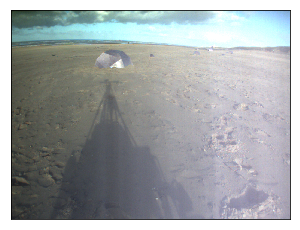

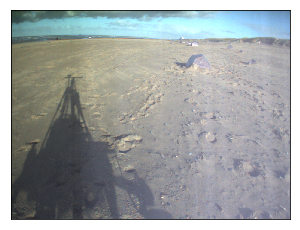

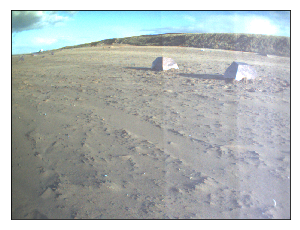

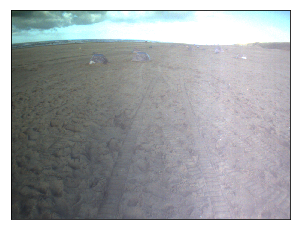

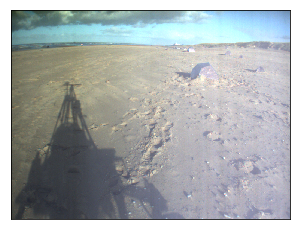

In [17]:
samples = 5
for i in range(samples):
    plot_imgs([random.choice(surface_data)], [""], (5,5))

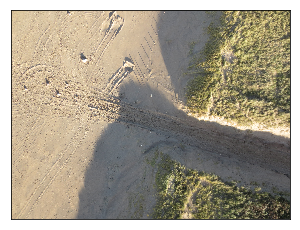

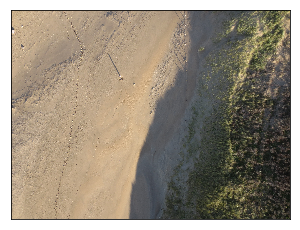

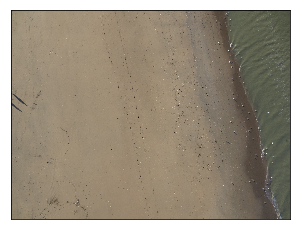

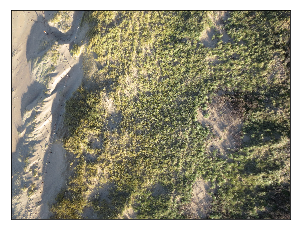

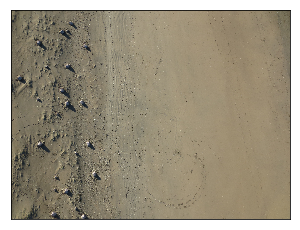

In [16]:
samples = 5
for i in range(samples):
    plot_imgs([orbital_data[i]], [""], (5,5))

## Pre-conclusions 

- Color doesn't matter, we can work with grayscale images.
- The shadow of the rover will be noise, we probably should get rid of those images, but how many of those are?, the sol was back for transverse one. The sky in surface images can also cause noise because of the clouds. 
- The detail is crucial, but the image dimension are huge, so we need to check if there is a way to create a grid on the aerial images in order to 1) create good surface-aerial pairs, 2) be more precise (cm/px), 3) downsample the images without losing a lot of information.
- There is not much variation.
- The neural network is effectively a compressed/compiled version of the dataset, so high quality pairs are so important. 